In [1]:
import pandas as pd
import numpy as np
import joblib

In [2]:

from sklearn.model_selection import train_test_split
df = pd.read_csv('E:\ML with VS\Material Compatibility\organic_material_compatibility_dataset.csv')

   


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\SAIDUL\AppData\Local\Temp\ipykernel_15552\2714349605.py:2: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('E:\ML with VS\Material Compatibility\organic_material_compatibility_dataset.csv')


In [3]:
df.describe()
df['compatibility_label'].value_counts()


compatibility_label
0    3633
1     619
Name: count, dtype: int64

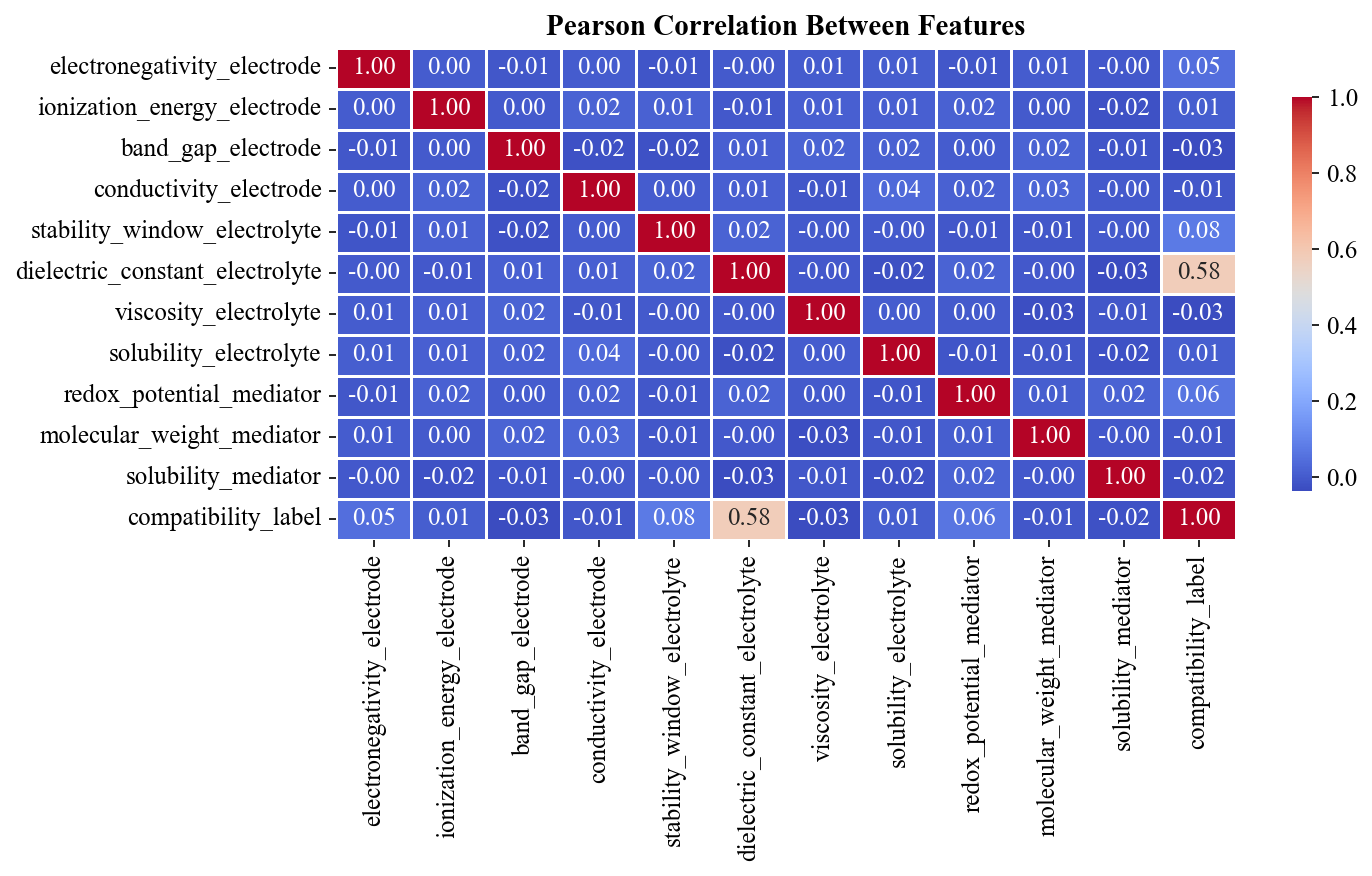

In [5]:


import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-feature and target columns
features_df = df.drop(columns=["Sample ID"])

# Calculate Pearson correlation
corr_matrix = features_df.corr(method="pearson")

# ===== Customize Options =====
fig_width = 10     # in inches
fig_height = 6     # in inches
fig_dpi = 150      # dots per inch

# Set global font
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# ===== Plot the Correlation Heatmap =====
plt.figure(figsize=(fig_width, fig_height), dpi=fig_dpi)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Pearson Correlation Between Features", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()



In [6]:
from sklearn.preprocessing import StandardScaler

from scipy.stats import chi2

# Separate features and target
X = df.drop(columns=["Sample ID", "compatibility_label"])
y = df["compatibility_label"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mean and covariance
mean_vec = np.mean(X_scaled, axis=0)
cov_matrix = np.cov(X_scaled, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Mahalanobis distance function
def mahalanobis(x, mean, inv_cov):
    diff = x - mean
    return np.sqrt(diff.T @ inv_cov @ diff)

# Distances
distances = np.array([mahalanobis(x, mean_vec, inv_cov_matrix) for x in X_scaled])

# Chi-square threshold (99% confidence)
threshold = chi2.ppf(0.99, df=X_scaled.shape[1])
outliers = np.where(distances**2 > threshold)[0]

print(f"Detected {len(outliers)} outliers")


Detected 0 outliers


Detected 0 outliers


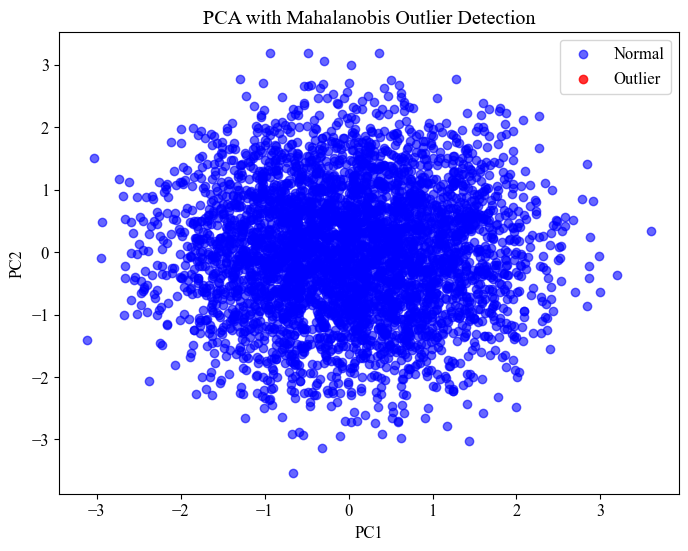

In [7]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import chi2

# ----------------------------
# 1. Prepare data
# ----------------------------
X = df.drop(columns=["Sample ID", "compatibility_label"])
y = df["compatibility_label"]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 2. Mahalanobis distance
# ----------------------------
mean_vec = np.mean(X_scaled, axis=0)
cov_matrix = np.cov(X_scaled, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

def mahalanobis(x, mean, inv_cov):
    diff = x - mean
    return np.sqrt(diff.T @ inv_cov @ diff)

distances = np.array([mahalanobis(x, mean_vec, inv_cov_matrix) for x in X_scaled])

# Chi-square threshold (99% confidence)
threshold = chi2.ppf(0.99, df=X_scaled.shape[1])
outliers = distances**2 > threshold

print(f"Detected {outliers.sum()} outliers")

# ----------------------------
# 3. PCA for visualization
# ----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ----------------------------
# 4. Plot PCA with outliers
# ----------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_pca[~outliers, 0], X_pca[~outliers, 1], 
            c='blue', label='Normal', alpha=0.6)
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], 
            c='red', label='Outlier', alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA with Mahalanobis Outlier Detection")
plt.legend()
plt.show()


Explained variance ratio: [0.09640461 0.0953438  0.09501641 0.09406672 0.09285307 0.09117981
 0.0897536  0.08869601 0.08779897 0.08565154 0.08323547]


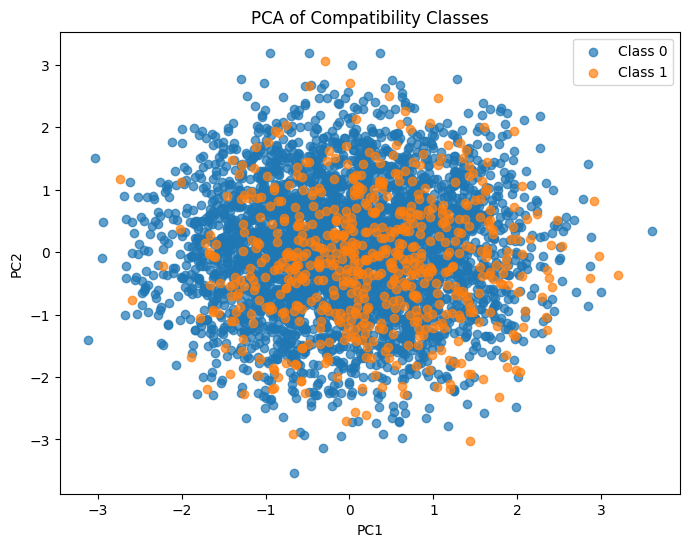

Cumulative explained variance: [0.09640461 0.19174841 0.28676482 0.38083154 0.4736846  0.56486441
 0.65461801 0.74331402 0.83111299 0.91676453 1.        ]
[0.09640461 0.19174841 0.28676482 0.38083154 0.4736846  0.56486441
 0.65461801 0.74331402 0.83111299 0.91676453 1.        ]


In [7]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ----------------------------
# 1. Prepare data
# ----------------------------
X = df.drop(columns=["Sample ID", "compatibility_label"])
y = df["compatibility_label"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 2. Perform PCA
# ----------------------------
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# ----------------------------
# 3. Plot PCA results by class
# ----------------------------
plt.figure(figsize=(8,6))
for label in sorted(y.unique()):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f"Class {label}", alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Compatibility Classes")
plt.legend()
plt.show()


explained = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:", explained)

pca = PCA(n_components=X.shape[1])
X_pca_full = pca.fit_transform(X_scaled)
explained = np.cumsum(pca.explained_variance_ratio_)
print(explained)



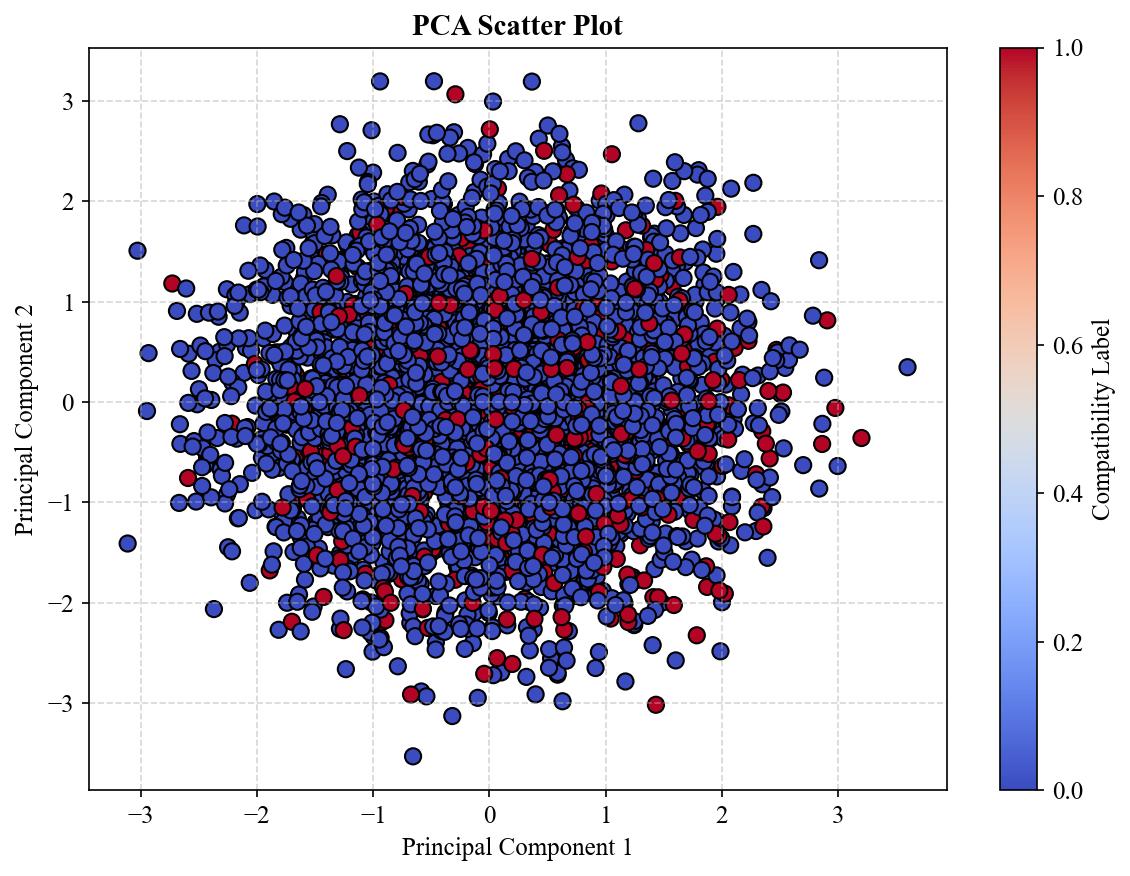

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ----------------------------
# 1. Prepare data
# ----------------------------
X = df.drop(columns=["Sample ID", "compatibility_label"])
y = df["compatibility_label"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 2. Perform PCA
# ----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ----------------------------
# 3. PCA Scatter Plot
# ----------------------------
# Customize options
fig_width = 8     # inches
fig_height = 6    # inches
fig_dpi = 150     # resolution

# Set global font
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# Create scatter plot
plt.figure(figsize=(fig_width, fig_height), dpi=fig_dpi)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=60)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot", fontsize=14, fontweight="bold")
plt.grid(True, linestyle='--', alpha=0.5)

# Add color legend
cbar = plt.colorbar(scatter)
cbar.set_label("Compatibility Label")

plt.tight_layout()
plt.show()



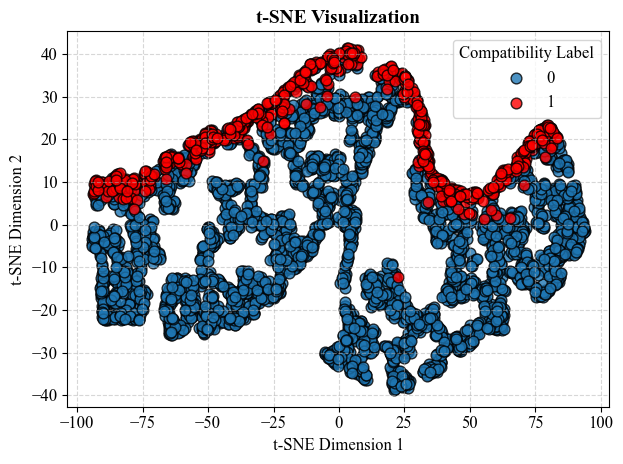

In [16]:
# Required libraries
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# ----------------------------
# 1. Prepare data
# ----------------------------
X = df.drop(columns=["Sample ID", "compatibility_label"])
y = df["compatibility_label"]

# ----------------------------
# 2. Perform t-SNE
# ----------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate='auto', init='pca')
X_tsne = tsne.fit_transform(X)

# ----------------------------
# 3. Customize plot options
# ----------------------------
fig_width = 10     # inches
fig_height = 6    # inches
fig_dpi = 150     # resolution

# Set global font
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# ----------------------------
# 4. Plot t-SNE result
# ----------------------------
colors = ['#1f77b4', 'red']
for i, label in enumerate(y.unique()):
    plt.scatter(
        X_tsne[y == label, 0],
        X_tsne[y == label, 1],
        label=str(label),
        color=colors[i],    # 👈 different color per label
        s=60,
        edgecolor='k',
        alpha=0.8
    )


plt.title("t-SNE Visualization", fontsize=14, fontweight="bold")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Compatibility Label")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Total number of Hotelling's T² outliers: 13
Hotelling's T² Outlier Sample IDs:
['M295', 'M599', 'M1384', 'M1513', 'M1716', 'M2044', 'M2121', 'M2702', 'M2926', 'M3358', 'M3456', 'M3620', 'M3896']


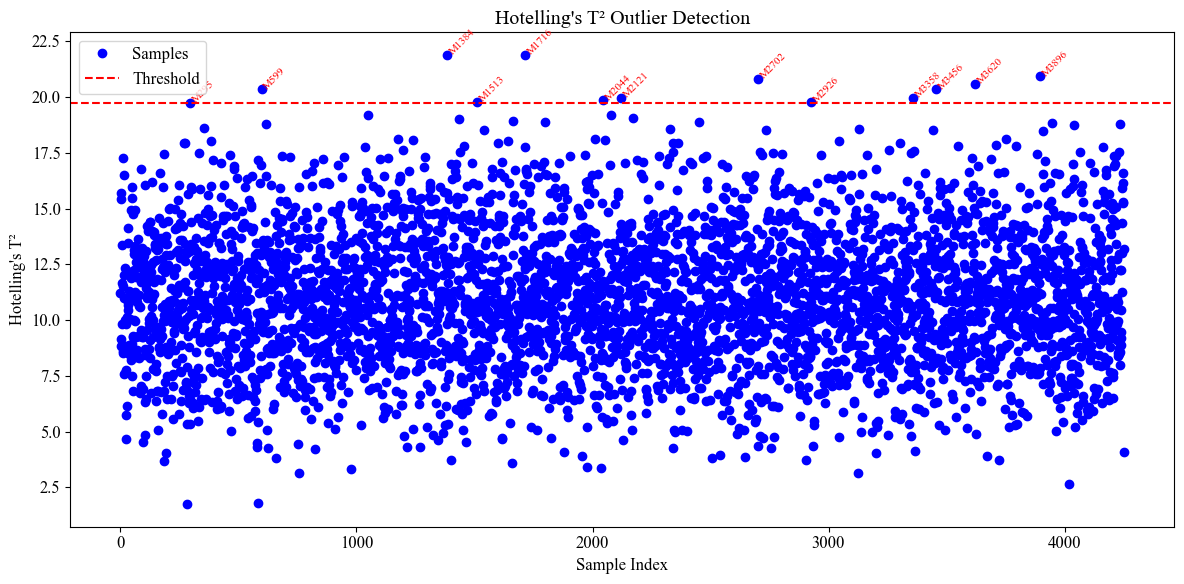

Number of Hotelling's T² outliers detected: 13
   Hotelling_T2_Outlier_Sample_ID
0                            M295
1                            M599
2                           M1384
3                           M1513
4                           M1716
5                           M2044
6                           M2121
7                           M2702
8                           M2926
9                           M3358
10                          M3456
11                          M3620
12                          M3896


In [17]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import f

import matplotlib.pyplot as plt

# Features (numeric only)
X = df.drop(columns=["Sample ID", "compatibility_label"])
y = df["compatibility_label"]

# Keep sample names
sample_names = df['Sample ID']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute mean vector and covariance matrix
mean_vec = np.mean(X_scaled, axis=0)
cov_matrix = np.cov(X_scaled, rowvar=False)
inv_cov = np.linalg.inv(cov_matrix)

# Compute Hotelling's T² for each sample
T2 = np.array([ (x - mean_vec).T @ inv_cov @ (x - mean_vec) for x in X_scaled ])

# Threshold (95% confidence)
n_samples, p = X_scaled.shape
alpha = 0.05
threshold = (p*(n_samples-1)/(n_samples-p)) * f.ppf(1-alpha, p, n_samples-p)

# Identify outliers
outlier_indices = np.where(T2 > threshold)[0]
outlier_sample_ids = sample_names.iloc[outlier_indices]

# Print total count and sample IDs
print("Total number of Hotelling's T² outliers:", len(outlier_sample_ids))
print("Hotelling's T² Outlier Sample IDs:")
print(outlier_sample_ids.tolist())


# Plot T² values with threshold and sample names
plt.figure(figsize=(12,6))
plt.plot(T2, 'bo', label='Samples')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')

# Label only outliers for clarity
for i in outlier_indices:
    plt.text(i, T2[i]+0.01, sample_names.iloc[i], fontsize=8, rotation=45, color='red')

plt.xlabel('Sample Index')
plt.ylabel("Hotelling's T²")
plt.title("Hotelling's T² Outlier Detection")
plt.legend()
plt.tight_layout()
plt.show()





# Create a DataFrame for outliers and reset index
outliers_df = pd.DataFrame({
    'Hotelling_T2_Outlier_Sample_ID': outlier_sample_ids.values
}).reset_index(drop=True)

# Print total count and DataFrame
print("Number of Hotelling's T² outliers detected:", len(outliers_df))
print(outliers_df)

Number of LOF outliers detected: 213
    LOF_Outlier_Sample_ID
0                      M3
1                     M12
2                     M48
3                     M88
4                    M106
..                    ...
208                 M4210
209                 M4213
210                 M4218
211                 M4230
212                 M4235

[213 rows x 1 columns]


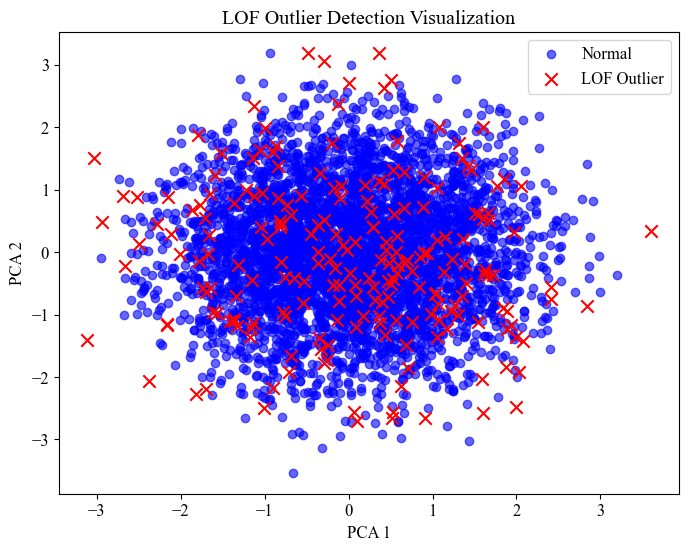

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_labels = lof.fit_predict(X_scaled)  # -1 = outlier, 1 = normal

# Get outlier sample IDs
outlier_sample_ids = df['Sample ID'][outlier_labels == -1]

# Create a DataFrame to display in column
outliers_df = pd.DataFrame({'LOF_Outlier_Sample_ID': outlier_sample_ids.values})

# Print
print("Number of LOF outliers detected:", len(outliers_df))
print(outliers_df)



# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
# Normal points
plt.scatter(X_pca[outlier_labels==1, 0], X_pca[outlier_labels==1, 1], 
            c='blue', label='Normal', alpha=0.6)
# Outliers
plt.scatter(X_pca[outlier_labels==-1, 0], X_pca[outlier_labels==-1, 1], 
            c='red', label='LOF Outlier', marker='x', s=80)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("LOF Outlier Detection Visualization")
plt.legend()
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
#  Prepare data
X = df.drop(columns=["Sample ID", "compatibility_label"])
y = df["compatibility_label"]  

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)
print(y)

0       0
1       0
2       1
3       1
4       0
       ..
4247    0
4248    0
4249    0
4250    0
4251    0
Name: compatibility_label, Length: 4252, dtype: int64


In [20]:

from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, mean_squared_error
)


# Parameter grid for tuning
param_grid = {
   'n_estimators': [10,50,100],
   'max_depth': [None, 10],
   'min_samples_split': [2, 5],
   'min_samples_leaf': [1, 2],
   'bootstrap': [True]
}

rf_model = RandomForestClassifier(random_state=42)

# Stratified K-Fold splitter
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit model on training data
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)

# Metrics on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
auc_roc = roc_auc_score(pd.get_dummies(y_test), y_prob, multi_class='ovr')

# Cross-validation scores with StratifiedKFold
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=skf, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# RMSECV from cross_val_predict with StratifiedKFold
y_cv_pred = cross_val_predict(best_rf_model, X_train, y_train, cv=skf)
rmsecv = np.sqrt(mean_squared_error(y_train, y_cv_pred))

# Print results
print("Random Forest Metrics after Hyperparameter Tuning:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision (macro): {precision:.4f}")
print(f"Test Recall (macro): {recall:.4f}")
print(f"Test F1 Score (macro): {f1:.4f}")
print(f"Test AUC-ROC (macro): {auc_roc:.4f}")
print(f"Mean CV Accuracy: {mean_cv_accuracy:.4f}")
print(f"RMSECV (from CV predictions): {rmsecv:.4f}")

train_accuracy = accuracy_score(y_train, best_rf_model.predict(X_train))
print(f"Train Accuracy: {train_accuracy:.4f}")

print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Save the model
joblib.dump(best_rf_model, "best_random_forest_model.pkl")

from sklearn.metrics import log_loss
print("Log Loss:", log_loss(y_test, y_prob))


Fitting 7 folds for each of 24 candidates, totalling 168 fits
Random Forest Metrics after Hyperparameter Tuning:
Test Accuracy: 0.9498
Test Precision (macro): 0.8907
Test Recall (macro): 0.9085
Test F1 Score (macro): 0.8993
Test AUC-ROC (macro): 0.9687
Mean CV Accuracy: 0.9429
RMSECV (from CV predictions): 0.2390
Train Accuracy: 0.9929
Best Parameters from GridSearchCV:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Log Loss: 0.16734707389495349


In [21]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, mean_squared_error
)


# Parameter grid for tuning
param_grid = {
    'C': [0.1, 0.5, 1,2],
    'kernel': [ 'rbf'],#'linear',
    'gamma': ['scale', 'auto', 0.01, 0.1,0.5]
}

# Initialize SVM model
svm_model = SVC(probability=True, random_state=42)

# Stratified K-Fold splitter
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Setup GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit model on training data
grid_search.fit(X_train, y_train)

# Get best model
best_svm_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_svm_model.predict(X_test)
y_prob = best_svm_model.predict_proba(X_test)

# Test set metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
auc_roc = roc_auc_score(pd.get_dummies(y_test), y_prob, multi_class='ovr')

# Cross-validation metrics on training set
cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=skf, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

y_cv_pred = cross_val_predict(best_svm_model, X_train, y_train, cv=skf)
rmsecv = np.sqrt(mean_squared_error(y_train, y_cv_pred))

# Print results
print("SVM Metrics after Hyperparameter Tuning:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision (macro): {precision:.4f}")
print(f"Test Recall (macro): {recall:.4f}")
print(f"Test F1 Score (macro): {f1:.4f}")
print(f"Test AUC-ROC (macro): {auc_roc:.4f}")
print(f"Mean CV Accuracy: {mean_cv_accuracy:.4f}")
print(f"RMSECV (from CV predictions): {rmsecv:.4f}")

train_accuracy = accuracy_score(y_train, best_svm_model.predict(X_train))
print(f"Train Accuracy: {train_accuracy:.4f}")

# Best parameters
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Save model
joblib.dump(best_svm_model, "best_svm_model.pkl")

from sklearn.metrics import log_loss
print("Log Loss:", log_loss(y_test, y_prob))


Fitting 7 folds for each of 20 candidates, totalling 140 fits
SVM Metrics after Hyperparameter Tuning:
Test Accuracy: 0.9522
Test Precision (macro): 0.8972
Test Recall (macro): 0.9099
Test F1 Score (macro): 0.9034
Test AUC-ROC (macro): 0.9828
Mean CV Accuracy: 0.9435
RMSECV (from CV predictions): 0.2376
Train Accuracy: 0.9476
Best Parameters from GridSearchCV:
{'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Log Loss: 0.11674979839990118


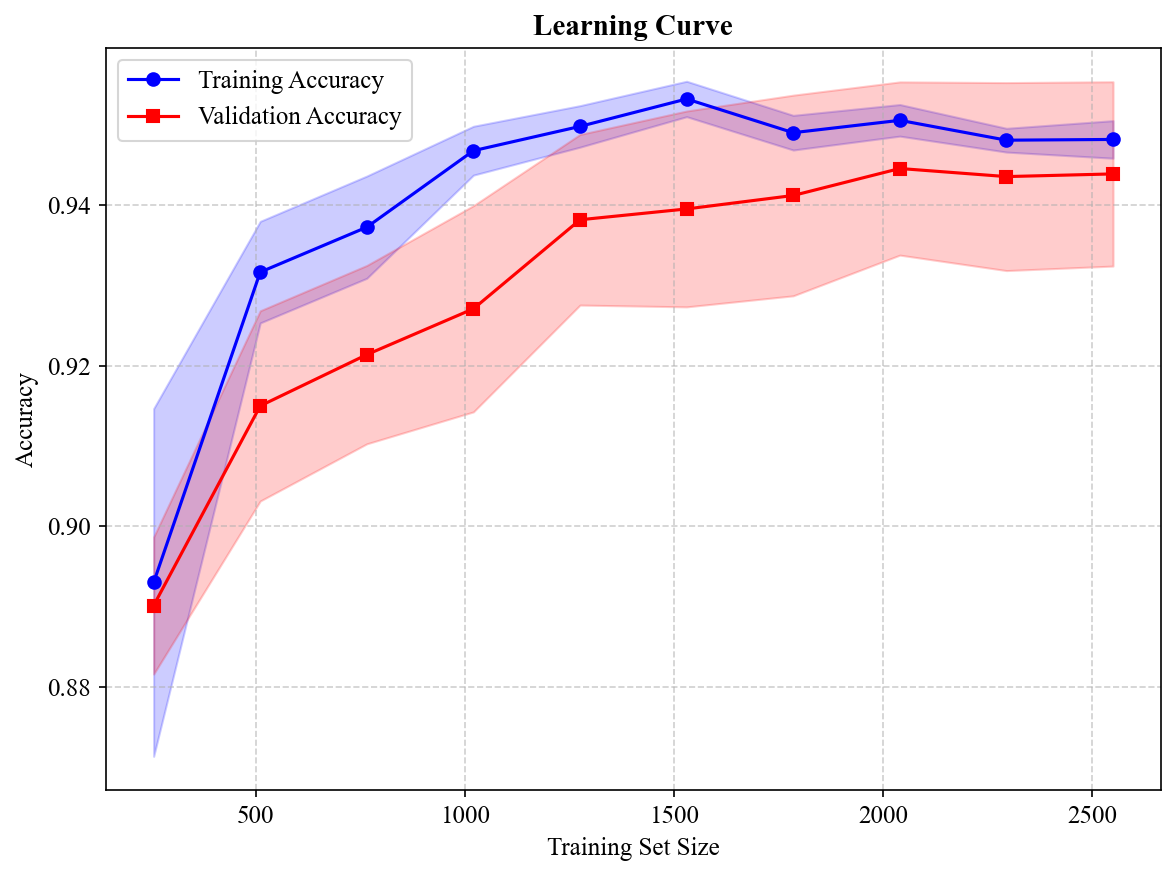

In [23]:

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# 1. Compute learning curve
# ----------------------------
train_sizes, train_scores, val_scores = learning_curve(
    best_svm_model, X_train, y_train, cv=skf, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# ----------------------------
# 2. Customize plot options
# ----------------------------
fig_width = 8     # inches
fig_height = 6    # inches
fig_dpi = 150     # resolution

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# ----------------------------
# 3. Plot learning curve
# ----------------------------
plt.figure(figsize=(fig_width, fig_height), dpi=fig_dpi)

plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='red', marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



C:\Users\SAIDUL\AppData\Local\Temp\ipykernel_15552\315305122.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


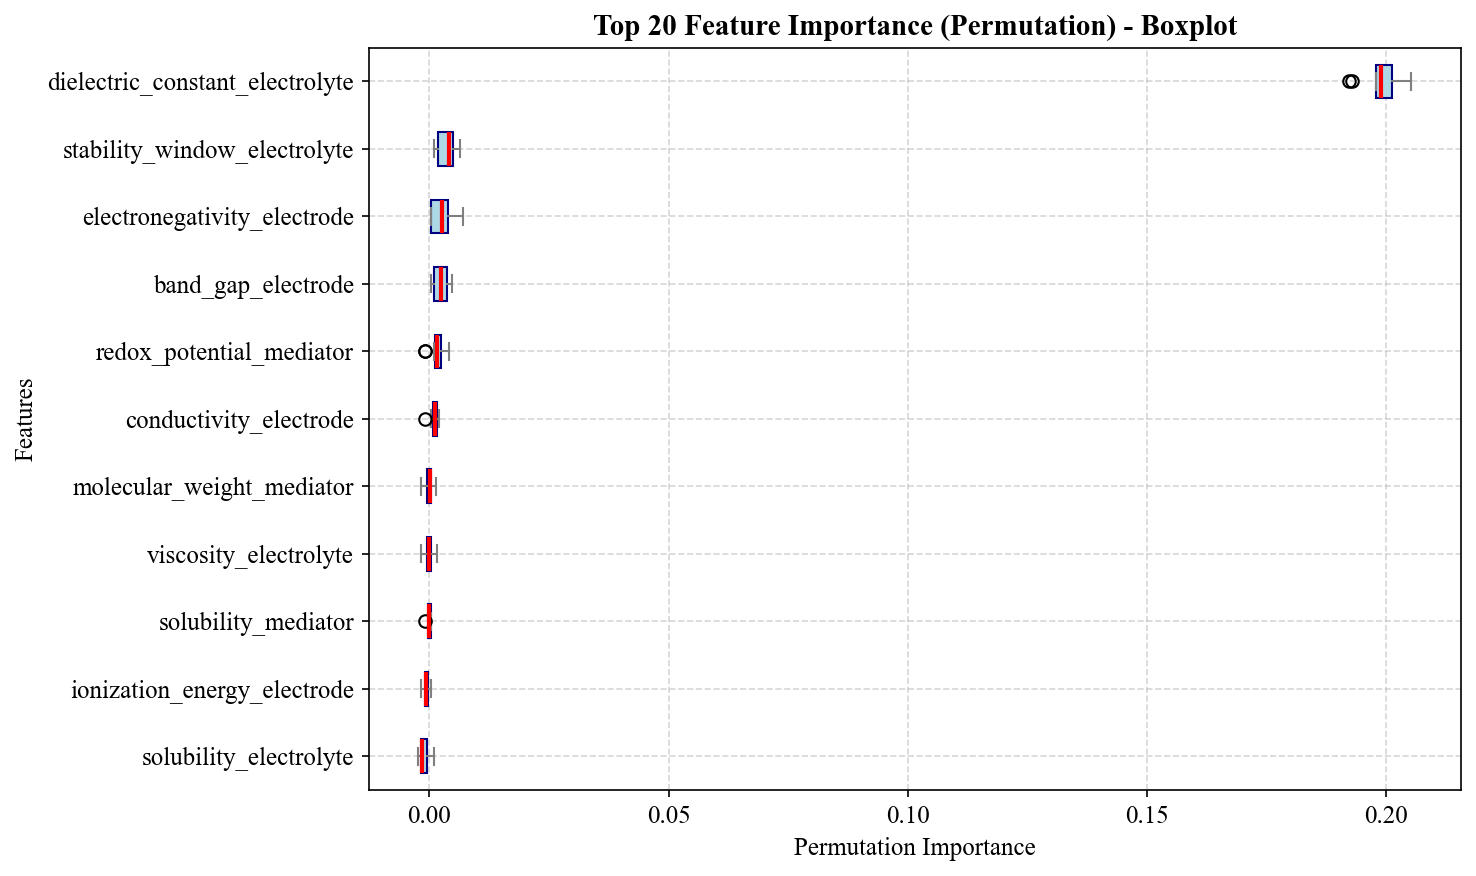

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance

# ----------------------------
# 1. Run permutation importance
# ----------------------------
result = permutation_importance(
    best_svm_model, X_train, y_train,
    n_repeats=10, random_state=42, n_jobs=-1
)

# Extract importance values
importances = result.importances

# Get feature names
feature_names = df.columns.drop(["Sample ID", "compatibility_label"]).to_numpy()

# ----------------------------
# 2. Select top 20 important features
# ----------------------------
mean_importances = importances.mean(axis=1)
top_idx = mean_importances.argsort()[-20:]
top_importances = importances[top_idx, :]
top_features = feature_names[top_idx]

# ----------------------------
# 3. Customize plot settings
# ----------------------------
fig_width = 10     # inches
fig_height = 6     # inches
fig_dpi = 150      # resolution

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# ----------------------------
# 4. Plot the boxplot
# ----------------------------
plt.figure(figsize=(fig_width, fig_height), dpi=fig_dpi)

plt.boxplot(
    top_importances.T,
    vert=False,
    labels=top_features,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='navy'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray')
)

plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Top 20 Feature Importance (Permutation) - Boxplot", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, mean_squared_error
)


# Stratified CV
cv_strategy = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_neighbors': [9,15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train, y_train)
best_knn_model = grid_search.best_estimator_

# Predict test set
y_pred = best_knn_model.predict(X_test)
y_prob = best_knn_model.predict_proba(X_test)
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
y_prob = best_knn_model.predict_proba(X_test)
auc_roc = roc_auc_score(pd.get_dummies(y_test), y_prob, multi_class='ovr')

# CV accuracy and RMSECV
cv_scores = cross_val_score(best_knn_model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

y_cv_pred = cross_val_predict(best_knn_model, X_train, y_train, cv=cv_strategy)
rmsecv = np.sqrt(mean_squared_error(y_train, y_cv_pred))

# Results
print("k-NN Metrics after Hyperparameter Tuning:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision (macro): {precision:.4f}")
print(f"Test Recall (macro): {recall:.4f}")
print(f"Test F1 Score (macro): {f1:.4f}")
print(f"Test AUC-ROC (macro): {auc_roc:.4f}")
print(f"Mean CV Accuracy: {mean_cv_accuracy:.4f}")
print(f"RMSECV (from CV predictions): {rmsecv:.4f}")
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

train_accuracy = accuracy_score(y_train, best_knn_model.predict(X_train))
print(f"Train Accuracy: {train_accuracy:.4f}")

# Save the best model
joblib.dump(best_knn_model, "best_knn_model.pkl")


from sklearn.metrics import log_loss
print("Log Loss:", log_loss(y_test, y_prob))

Fitting 7 folds for each of 12 candidates, totalling 84 fits
k-NN Metrics after Hyperparameter Tuning:
Test Accuracy: 0.8918
Test Precision (macro): 0.8329
Test Recall (macro): 0.6626
Test F1 Score (macro): 0.7065
Test AUC-ROC (macro): 0.9202
Mean CV Accuracy: 0.8841
RMSECV (from CV predictions): 0.3405
Best Parameters from GridSearchCV:
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Train Accuracy: 1.0000
Log Loss: 0.32816666662652483


In [26]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, mean_squared_error
)


# Define parameter grid
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Define Stratified K-Fold
stratified_kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# Define model
nb_model = GaussianNB()

# GridSearchCV with stratified 7-fold CV
grid_search = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid,
    cv=stratified_kfold,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train, y_train)

# Best model
best_nb_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_nb_model.predict(X_test)
y_prob = best_nb_model.predict_proba(X_test)
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
y_prob = best_nb_model.predict_proba(X_test)
auc_roc = roc_auc_score(pd.get_dummies(y_test), y_prob, multi_class='ovr')

# Cross-validation scores on training data
cv_scores = cross_val_score(best_nb_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# RMSECV using stratified cross_val_predict
y_cv_pred = cross_val_predict(best_nb_model, X_train, y_train, cv=stratified_kfold)
rmsecv = np.sqrt(mean_squared_error(y_train, y_cv_pred))

# Print results
print("Naive Bayes Metrics after Hyperparameter Tuning:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision (macro): {precision:.4f}")
print(f"Test Recall (macro): {recall:.4f}")
print(f"Test F1 Score (macro): {f1:.4f}")
print(f"Test AUC-ROC (macro): {auc_roc:.4f}")
print(f"Mean CV Accuracy: {mean_cv_accuracy:.4f}")
print(f"RMSECV (from CV predictions): {rmsecv:.4f}")

# Best parameters
print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# Train accuracy
train_accuracy = accuracy_score(y_train, best_nb_model.predict(X_train))
print(f"Train Accuracy: {train_accuracy:.4f}")

# Save model
joblib.dump(best_nb_model, "best_naive_bayes_model.pkl")


from sklearn.metrics import log_loss
print("Log Loss:", log_loss(y_test, y_prob))

Fitting 7 folds for each of 6 candidates, totalling 42 fits
Naive Bayes Metrics after Hyperparameter Tuning:
Test Accuracy: 0.9444
Test Precision (macro): 0.8674
Test Recall (macro): 0.9307
Test F1 Score (macro): 0.8950
Test AUC-ROC (macro): 0.9795
Mean CV Accuracy: 0.9415
RMSECV (from CV predictions): 0.2418
Best Parameters from GridSearchCV:
{'var_smoothing': 1e-10}
Train Accuracy: 0.9425
Log Loss: 0.1365677577814231


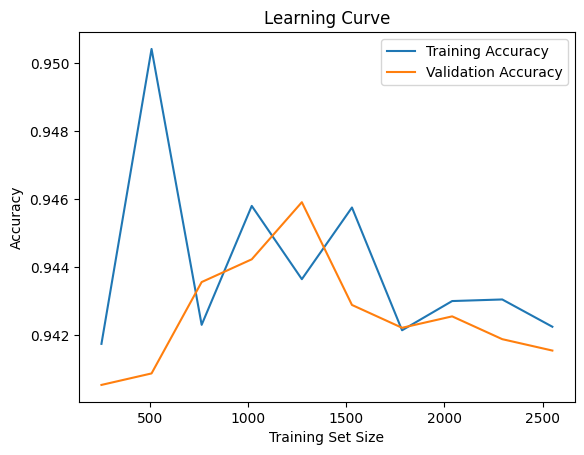

In [19]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    best_nb_model, X_train, y_train, cv=skf, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, val_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

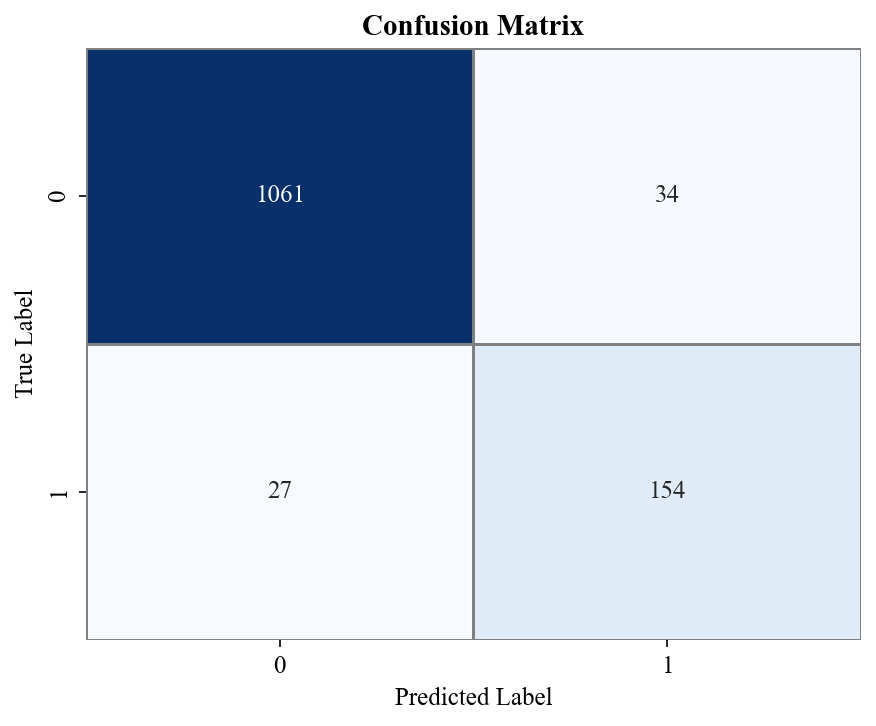

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1095
           1       0.82      0.85      0.83       181

    accuracy                           0.95      1276
   macro avg       0.90      0.91      0.90      1276
weighted avg       0.95      0.95      0.95      1276

      Actual  Predicted
184        0          0
2576       0          0
2542       0          0
3873       0          0
958        0          0


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
import pandas as pd

# ----------------------------
# 1. Load the saved model
# ----------------------------
best_svm_model = joblib.load("best_svm_model.pkl")

# ----------------------------
# 2. Make predictions
# ----------------------------
y_pred = best_svm_model.predict(X_test)

# ----------------------------
# 3. Compute the confusion matrix
# ----------------------------
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)

# ----------------------------
# 4. Customize plot settings
# ----------------------------
fig_width = 6     # inches
fig_height = 5    # inches
fig_dpi = 150     # resolution

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# ----------------------------
# 5. Plot the confusion matrix
# ----------------------------
plt.figure(figsize=(fig_width, fig_height), dpi=fig_dpi)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Classification report
# ----------------------------
report = classification_report(y_test, y_pred, target_names=[str(l) for l in labels])
print(report)

# ----------------------------
# 7. Create DataFrame comparing actual vs predicted
# ----------------------------
comparison_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
print(comparison_df.head())



